# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

In [ ]:
# who: a group of c-suite executives
# what: customer churn data
# why: to discuss methods tto increase customer retention

# 3. Homework - work with your own data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [7]:
df = pd.read_csv('Crop_Recommendation.csv')
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
duplicates = df[df.duplicated()]
print(duplicates)

print('There are no duplicated data rows')

Empty DataFrame
Columns: [Nitrogen, Phosphorus, Potassium, Temperature, Humidity, pH_Value, Rainfall, Crop]
Index: []


In [9]:
duplicate_values = df.apply(lambda x: x[x.duplicated()].unique(), axis=0)
print(duplicate_values)

print('There are duplicated values but that is not an issue with this dataset. It would be important to do this top chedck if there are duplicated IDs for different records, for instance')

Nitrogen       [69, 90, 78, 94, 60, 85, 91, 89, 97, 98, 88, 9...
Phosphorus     [42, 55, 58, 53, 35, 38, 59, 50, 37, 54, 57, 4...
Potassium      [42, 40, 38, 44, 41, 39, 36, 43, 37, 35, 45, 1...
Temperature                                                   []
Humidity                                                      []
pH_Value                                                      []
Rainfall                                                      []
Crop           [Rice, Maize, ChickPea, KidneyBeans, PigeonPea...
dtype: object
There are duplicated values but that is not an issue with this dataset. It would be important to do this top chedck if there are duplicated IDs for different records, for instance


In [15]:
df_2 = df.drop(columns=['Crop'])

mean_values = df_2.mean()
median_values = df_2.median()
mode_values = df_2.mode()

print('The mean vales are:',mean_values)
print('The median vales are:',median_values)
print('The mode vales are:',mode_values)

The mean vales are: Nitrogen        50.551818
Phosphorus      53.362727
Potassium       48.149091
Temperature     25.616244
Humidity        71.481779
pH_Value         6.469480
Rainfall       103.463655
dtype: float64
The median vales are: Nitrogen       37.000000
Phosphorus     51.000000
Potassium      32.000000
Temperature    25.598693
Humidity       80.473146
pH_Value        6.425045
Rainfall       94.867624
dtype: float64
The mode vales are:       Nitrogen  Phosphorus  Potassium  Temperature   Humidity  pH_Value  \
0         22.0        60.0       17.0     8.825675  14.258040  3.504752   
1         40.0         NaN        NaN     9.467960  14.273280  3.510404   
2          NaN         NaN        NaN     9.535586  14.280419  3.525366   
3          NaN         NaN        NaN     9.724458  14.323138  3.532009   
4          NaN         NaN        NaN     9.851243  14.338474  3.558823   
...        ...         ...        ...          ...        ...       ...   
2195       NaN         NaN

In [17]:
missing_values = df.isnull().sum()

print(missing_values)
print('There are no missing values')

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64
There are no missing values


In [18]:
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print(df_encoded.head())

   Nitrogen  Phosphorus  Potassium  Temperature   Humidity  pH_Value  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

     Rainfall  Crop_Banana  Crop_Blackgram  Crop_ChickPea  ...  Crop_Mango  \
0  202.935536        False           False          False  ...       False   
1  226.655537        False           False          False  ...       False   
2  263.964248        False           False          False  ...       False   
3  242.864034        False           False          False  ...       False   
4  262.717340        False           False          False  ...       False   

   Crop_MothBeans  Crop_MungBean  Crop_Muskmelon  Crop_Orange  Crop_Papaya  \
0           False   

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

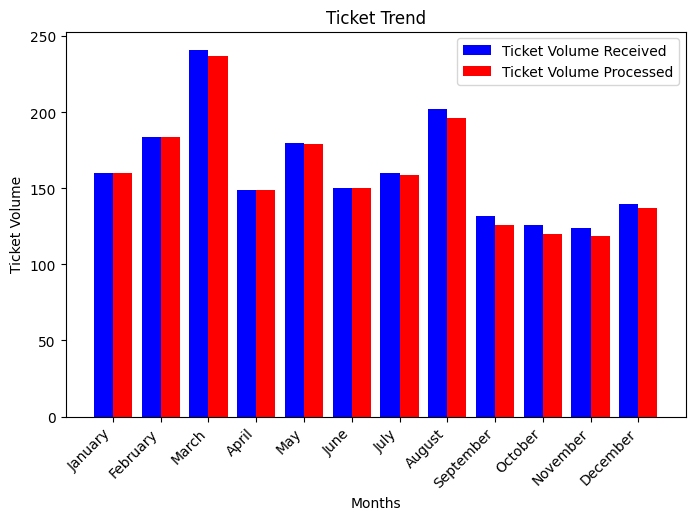

In [21]:
import matplotlib.pyplot as plt

months = ["January", "February", "March", "April", "May", "June", "July", "August", 
          "September", "October", "November", "December"]
received = [160, 184, 241, 149, 180, 150, 160, 202, 132, 126, 124, 140]
processed = [160, 184, 237, 149, 179, 150, 159, 196, 126, 120, 119, 137]

fig, ax = plt.subplots(figsize=(8, 5))

x = range(len(months)) 
width = .4


rects1 = ax.bar([i - width/2 for i in x], received, width, label="Ticket Volume Received", color='blue')
rects2 = ax.bar([i + width/2 for i in x], processed, width, label="Ticket Volume Processed", color='red')

ax.set_xlabel("Months")
ax.set_ylabel("Ticket Volume")
ax.set_title("Ticket Trend")
ax.set_xticks(x)
ax.set_xticklabels(months, rotation=45, ha="right")
ax.legend()